In [1]:
%pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from scipy.stats import ttest_ind

osd_660_df = pd.read_csv("/Users/ethannepo/Desktop/BIOL123 Files/western blots/OSD_660_LSDS-68_western-blot_WesternBlot_TA_TRANSFORMED.csv")
osd_662_df = pd.read_csv("/Users/ethannepo/Desktop/BIOL123 Files/western blots/OSD_662_LSDS-75_western-blot_soleus_westernblot_TRANSFORMED.csv")
osd_663_df = pd.read_csv("/Users/ethannepo/Desktop/BIOL123 Files/western blots/OSD_663_LSDS-70_western-blot_Western_blot_femur_TRANSFORMED.csv")
osd_664_df = pd.read_csv("/Users/ethannepo/Desktop/BIOL123 Files/western blots/OSD_664_LSDS-71_western-blot_Westernblot_EDL_TRANSFORMED.csv")

feature_names = ["Sample Name", "GSK3_beta_content", "serine9_phosphorylated_GSK3_beta_content", "ratio_of_phosphorylated_serine_9_to_total_GSK3_beta_content_",
                         "GSK3_alpha_content", "serine_21_phosphorylated_GSK3_alpha_content", "ratio_of_serine_21_phosphorylated_to_total_GSK3_alpha_content"]  

test_names = ["GSK3_beta_content", "serine9_phosphorylated_GSK3_beta_content", "ratio_of_phosphorylated_serine_9_to_total_GSK3_beta_content_",
                         "GSK3_alpha_content", "serine_21_phosphorylated_GSK3_alpha_content", "ratio_of_serine_21_phosphorylated_to_total_GSK3_alpha_content"]  

osd_663_feature_names = ["Sample Name", "GSK3_beta_content", "serine9_phosphorylated_GSK3_beta_content", "ratio_of_phosphorylated_serine_9_to_total_GSK3_beta_content_"]

osd_663_test_names = ["GSK3_beta_content", "serine9_phosphorylated_GSK3_beta_content", "ratio_of_phosphorylated_serine_9_to_total_GSK3_beta_content_"]

osd_660_df_filtered = osd_660_df[feature_names]
osd_662_df_filtered = osd_662_df[feature_names]
osd_663_df_filtered = osd_663_df[osd_663_feature_names]
osd_664_df_filtered = osd_664_df[feature_names]

osd_660_cleaned_filtered = osd_660_df_filtered.dropna()
osd_662_cleaned_filtered = osd_662_df_filtered.dropna()
osd_663_cleaned_filtered = osd_663_df_filtered.dropna()
osd_664_cleaned_filtered = osd_664_df_filtered.dropna()

def label_group(name):
    name = name.lower()
    if 'viv' in name:
        return 0
    elif 'f' in name:
        return 1
    elif 'gc' in name:
        return 2
    
osd_660_cleaned_filtered['Sample Type'] = osd_660_cleaned_filtered['Sample Name'].apply(label_group)
osd_662_cleaned_filtered['Sample Type'] = osd_662_cleaned_filtered['Sample Name'].apply(label_group)
osd_663_cleaned_filtered['Sample Type'] = osd_663_cleaned_filtered['Sample Name'].apply(label_group)
osd_664_cleaned_filtered['Sample Type'] = osd_664_cleaned_filtered['Sample Name'].apply(label_group)


/var/folders/ry/cph54fg93lv8wv980w32kpdh0000gn/T/ipykernel_72236/636586816.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osd_660_cleaned_filtered['Sample Type'] = osd_660_cleaned_filtered['Sample Name'].apply(label_group)
/var/folders/ry/cph54fg93lv8wv980w32kpdh0000gn/T/ipykernel_72236/636586816.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osd_662_cleaned_filtered['Sample Type'] = osd_662_cleaned_filtered['Sample Name'].apply(label_group)
/var/folders/ry/cph54fg93lv8wv980w32kpdh0000gn/T/ipyke

In [3]:
for feature in test_names:
    flight_660 = osd_660_cleaned_filtered[osd_660_cleaned_filtered['Sample Type'] == 1][feature]
    ground_control_660 = osd_660_cleaned_filtered[osd_660_cleaned_filtered['Sample Type'] == 2][feature]
    
    t_stat, p_val = ttest_ind(flight_660, ground_control_660)
    if p_val < .05:
        print(f"OSD660 {feature}: t = {t_stat:.2f}, p = {p_val:.4f}")

for feature in test_names:
    flight_662 = osd_662_cleaned_filtered[osd_662_cleaned_filtered['Sample Type'] == 1][feature]
    ground_control_662 = osd_662_cleaned_filtered[osd_662_cleaned_filtered['Sample Type'] == 2][feature]
    
    t_stat, p_val = ttest_ind(flight_662, ground_control_662)
    if p_val < .05:
        print(f"OSD662 {feature}: t = {t_stat:.2f}, p = {p_val:.4f}")

for feature in osd_663_test_names:
    flight_663 = osd_663_cleaned_filtered[osd_663_cleaned_filtered['Sample Type'] == 1][feature]
    ground_control_663 = osd_663_cleaned_filtered[osd_663_cleaned_filtered['Sample Type'] == 2][feature]
    
    t_stat, p_val = ttest_ind(flight_663, ground_control_663)
    if p_val < .05:
        print(f"OSD663 {feature}: t = {t_stat:.2f}, p = {p_val:.4f}")

for feature in test_names:
    flight_664 = osd_664_cleaned_filtered[osd_664_cleaned_filtered['Sample Type'] == 1][feature]
    ground_control_664 = osd_664_cleaned_filtered[osd_664_cleaned_filtered['Sample Type'] == 2][feature]
    
    t_stat, p_val = ttest_ind(flight_664, ground_control_664)
    if p_val < .05:
        print(f"OSD664 {feature}: t = {t_stat:.2f}, p = {p_val:.4f}")

OSD662 GSK3_beta_content: t = -5.10, p = 0.0000
OSD662 serine9_phosphorylated_GSK3_beta_content: t = -2.60, p = 0.0127


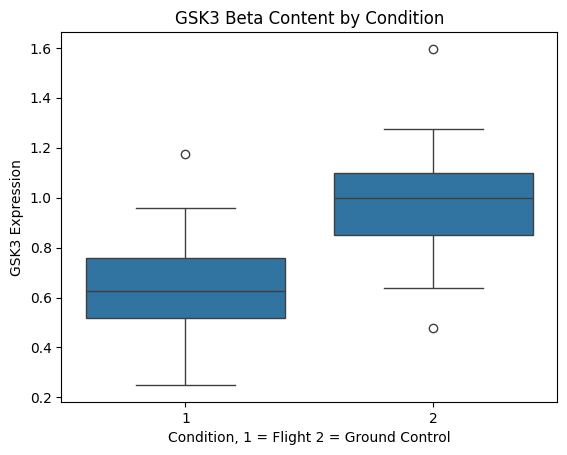

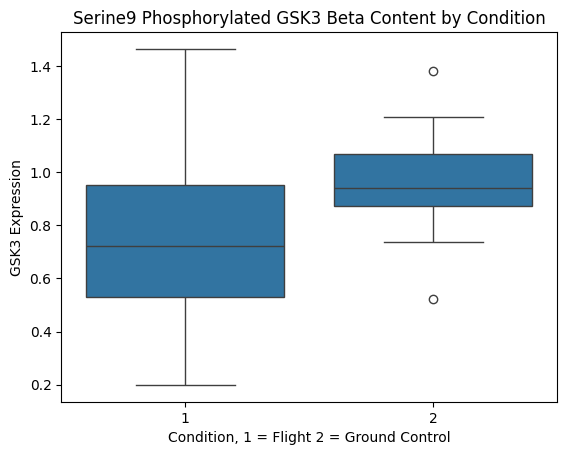

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='Sample Type', y='GSK3_beta_content', data=osd_662_cleaned_filtered[osd_662_cleaned_filtered['Sample Type'] >= 1])
plt.title('GSK3 Beta Content by Condition')
plt.xlabel('Condition, 1 = Flight 2 = Ground Control')
plt.ylabel('GSK3 Expression')
plt.show()

sns.boxplot(x='Sample Type', y='serine9_phosphorylated_GSK3_beta_content', data=osd_662_cleaned_filtered[osd_662_cleaned_filtered['Sample Type'] >= 1])
plt.title('Serine9 Phosphorylated GSK3 Beta Content by Condition')
plt.xlabel('Condition, 1 = Flight 2 = Ground Control')
plt.ylabel('GSK3 Expression')
plt.show()

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_660 = osd_660_cleaned_filtered[test_names]
y_660 = osd_660_cleaned_filtered['Sample Type']

X_train_660, X_test_660, y_train_660, y_test_660 = train_test_split(X_660, y_660, test_size=0.2, random_state=0)

forest_660 = RandomForestClassifier(n_estimators=100, random_state=14)
forest_660.fit(X_train_660, y_train_660)

y_pred_660 = forest_660.predict(X_test_660)
print(confusion_matrix(y_test_660, y_pred_660))
print(classification_report(y_test_660, y_pred_660))


[[1 1 1]
 [0 1 1]
 [0 0 0]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      0.50      0.50         2
           2       0.00      0.00      0.00         0

    accuracy                           0.40         5
   macro avg       0.50      0.28      0.33         5
weighted avg       0.80      0.40      0.50         5



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [6]:
X_662 = osd_662_cleaned_filtered[test_names]
y_662 = osd_662_cleaned_filtered['Sample Type']

X_train_662, X_test_662, y_train_662, y_test_662 = train_test_split(X_662, y_662, test_size=0.2, random_state=0)

forest_662 = RandomForestClassifier(n_estimators=100, random_state=14)
forest_662.fit(X_train_662, y_train_662)

y_pred_662 = forest_662.predict(X_test_662)
print(confusion_matrix(y_test_662, y_pred_662))
print(classification_report(y_test_662, y_pred_662))

[[3 2 0]
 [0 4 1]
 [1 2 2]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.50      0.80      0.62         5
           2       0.67      0.40      0.50         5

    accuracy                           0.60        15
   macro avg       0.64      0.60      0.59        15
weighted avg       0.64      0.60      0.59        15



In [7]:
X_663 = osd_663_cleaned_filtered[osd_663_test_names]
y_663 = osd_663_cleaned_filtered['Sample Type']

X_train_663, X_test_663, y_train_663, y_test_663 = train_test_split(X_663, y_663, test_size=0.2, random_state=0)

forest_663 = RandomForestClassifier(n_estimators=100, random_state=14)
forest_663.fit(X_train_663, y_train_663)

y_pred_663 = forest_663.predict(X_test_663)
print(confusion_matrix(y_test_663, y_pred_663))
print(classification_report(y_test_663, y_pred_663))

[[0 1 2]
 [0 0 0]
 [0 0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         0
           2       0.33      1.00      0.50         1

    accuracy                           0.25         4
   macro avg       0.11      0.33      0.17         4
weighted avg       0.08      0.25      0.12         4



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

In [8]:
X_664 = osd_664_cleaned_filtered[test_names]
y_664 = osd_664_cleaned_filtered['Sample Type']

X_train_664, X_test_664, y_train_664, y_test_664 = train_test_split(X_664, y_664, test_size=0.2, random_state=0)

forest_664 = RandomForestClassifier(n_estimators=100, random_state=14)
forest_664.fit(X_train_664, y_train_664)

y_pred_664 = forest_664.predict(X_test_664)
print(confusion_matrix(y_test_664, y_pred_664))
print(classification_report(y_test_664, y_pred_664))


[[1 1 0]
 [0 0 0]
 [0 1 0]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.33      0.17      0.22         3
weighted avg       0.67      0.33      0.44         3



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr